# Aryan Thakur 
## Assignment 4

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support

In [19]:
df = pd.read_csv("https://github.com/mishravipul/data/raw/main/divorce.csv", delimiter=';')

In [20]:
df.insert(0, 'Bias', 1)

In [21]:
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Target

In [22]:
print(f"X shape: {X.shape}, dtype: {X.dtype}")
print(f"y shape: {y.shape}, dtype: {y.dtype}")

X shape: (170, 55), dtype: int64
y shape: (170,), dtype: int64


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
class LogisticRegression:
    def __init__(self, lr=0.1, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def log_likelihood(self, X, y):
        z = np.dot(X, self.weights)
        return np.sum(y * z - np.log(1 + np.exp(z)))
    
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        for i in range(self.epochs):
            z = np.dot(X, self.weights)
            predictions = self.sigmoid(z)
            gradient = np.dot(X.T, (y - predictions)) / y.size
            self.weights += self.lr * gradient
            if i % 100 == 0:
                print(f"Iteration {i}: Log Likelihood = {self.log_likelihood(X, y)}")
    
    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.weights))
    
    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

In [26]:
model = LogisticRegression()
model.fit(X_train, y_train)

Iteration 0: Log Likelihood = -26.342351109391565
Iteration 100: Log Likelihood = -7.634544350734421
Iteration 200: Log Likelihood = -5.7926093630183635
Iteration 300: Log Likelihood = -4.533797836305027
Iteration 400: Log Likelihood = -3.6517532859175272
Iteration 500: Log Likelihood = -3.018241482254967
Iteration 600: Log Likelihood = -2.551091847322762
Iteration 700: Log Likelihood = -2.197601570986512
Iteration 800: Log Likelihood = -1.9235942649622197
Iteration 900: Log Likelihood = -1.7065118551860419


In [27]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [28]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='binary')

In [29]:
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

Train Accuracy: 1.0000
Test Accuracy: 0.9615
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.93      0.97        15

    accuracy                           0.96        26
   macro avg       0.96      0.97      0.96        26
weighted avg       0.96      0.96      0.96        26

Precision: 1.0000, Recall: 0.9333, F1 Score: 0.9655


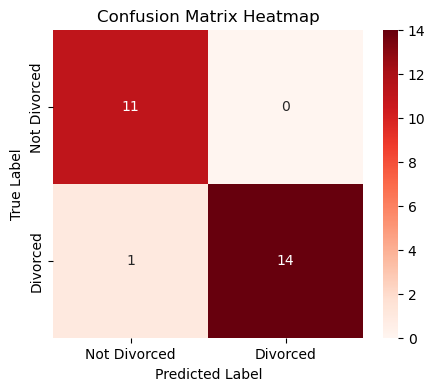

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Create heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", 
            xticklabels=['Not Divorced', 'Divorced'], 
            yticklabels=['Not Divorced', 'Divorced'])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()
